# Episode 2: Single-Qubit Gates, Bloch Sphere & Measurement (Qiskit Toolkit)

*In this session, we’ll explore single-qubit gates using Qiskit & Quantum Rings Toolkit, visualize states on the Bloch sphere, and measure outcomes.*

## Objectives
1. Apply X, Y, Z, H, S, and T gates using Qiskit circuits<br/>2. Execute circuits on the Quantum Rings noise-free backend via the Toolkit<br/>3. Visualize resulting states on the Bloch sphere with Qiskit visualization

In [1]:
# === 1. Setup & Imports
from QuantumRingsLib import QuantumRingsProvider
from quantumrings.toolkit.qiskit import QrBackendV2  
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt

# Load saved account and select noise-free backend
provider = QuantumRingsProvider()
backend = provider.get_backend("scarlet_quantum_rings")

## 2. Helper Function: Run & Plot
This function runs on the QR backend (counts) and shows a Bloch sphere of the pre-measurement state.

In [2]:
def run_and_plot(qc: QuantumCircuit, label: str):
    # a) Initialize a QrBackendV2 for exactly the size of your circuit
    num_qubits = qc.num_qubits
    qr_backend = QrBackendV2(provider=provider, num_qubits=num_qubits+1)

    # b) Execute on Quantum Rings
    job    = qr_backend.run(qc, shots=1024)
    result = job.result()
    print(f"{label} counts: {result.get_counts()}")

    # c) Strip measurements for statevector simulation
    qc_sv = qc.remove_final_measurements(inplace=False)
    sv    = Statevector.from_instruction(qc_sv)

    # d) Plot Bloch sphere for a single qubit
    fig = plot_bloch_multivector(sv.data, title=f"{label} — Bloch Sphere")
    display(fig)

## 3. Gate Demonstrations

X gate counts: {'1': 1024}


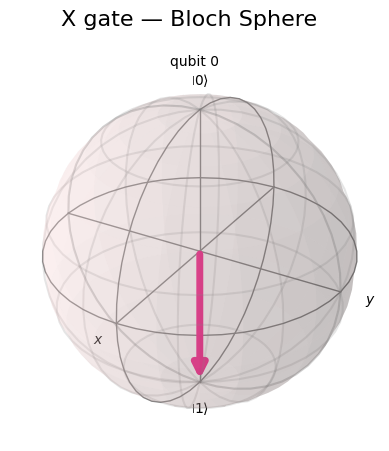

H gate (|+>) counts: {'0': 520, '1': 504}


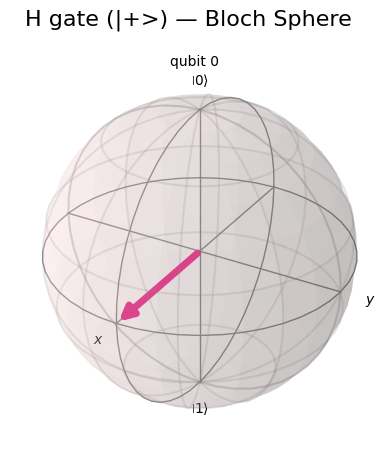

In [3]:
# X gate demo
qc_x = QuantumCircuit(1,1)
qc_x.x(0)
qc_x.measure(0,0)
run_and_plot(qc_x, 'X gate')

# H gate demo
qc_h = QuantumCircuit(1,1)
qc_h.h(0)
qc_h.measure(0,0)
run_and_plot(qc_h, 'H gate (|+>)')


Y gate counts: {'1': 1024}


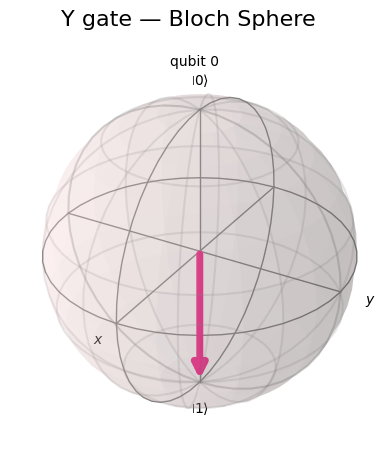

In [4]:
# Y gate on |0> → flips to |1> (measure '1')
qc_y = QuantumCircuit(1, 1)
qc_y.y(0)
qc_y.measure(0, 0)
run_and_plot(qc_y, 'Y gate')

Z gate counts: {'0': 1024}


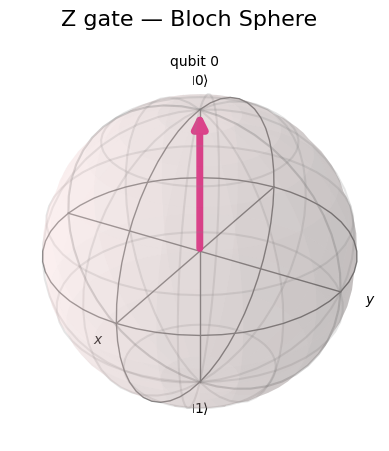

In [5]:
# Z gate on |0> → no change (always '0')
qc_z = QuantumCircuit(1, 1)
qc_z.z(0)
qc_z.measure(0, 0)
run_and_plot(qc_z, 'Z gate')

H gate (|+>) counts: {'0': 497, '1': 527}


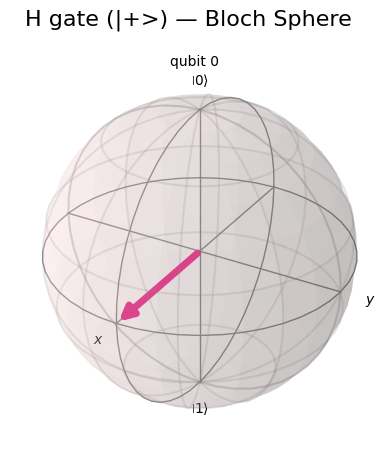

In [6]:
# Hadamard gate prepares |+> superposition
qc_h = QuantumCircuit(1, 1)
qc_h.h(0)
qc_h.measure(0, 0)
run_and_plot(qc_h, 'H gate (|+>)')

S gate counts: {'0': 505, '1': 519}


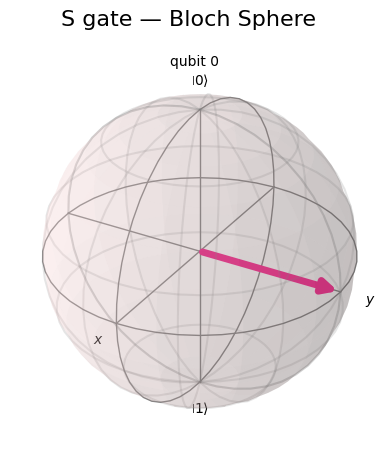

T gate counts: {'0': 482, '1': 542}


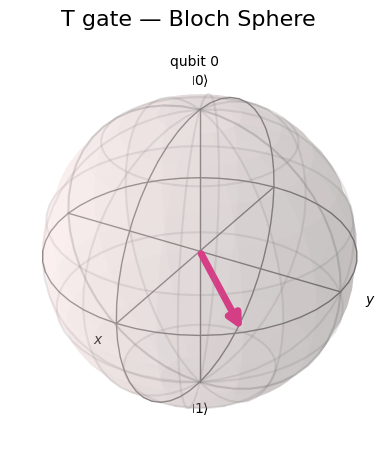

In [7]:
# S and T gates (phase shifts) on |+>
qc_s = QuantumCircuit(1, 1)
qc_s.h(0)
qc_s.s(0)
qc_s.measure(0, 0)
run_and_plot(qc_s, 'S gate')

qc_t = QuantumCircuit(1, 1)
qc_t.h(0)
qc_t.t(0)
qc_t.measure(0, 0)
run_and_plot(qc_t, 'T gate')

----
### Next Up
**Episode 3: Entanglement & Multi-Qubit Gates**

We’ll create Bell pairs, GHZ states, and explore multi-qubit interactions.